## Text Similarity

## 0 Loading Documents

#### 0.0 Random list of sentences

In [1]:
sentences = [
    'He was in need of some cash.',
    'He withdrew money from the bank today.',
    'She bought groceries from market today.',
    "He went by the river bank and slept under a tree.",
    'The painter painted a beautiful picture of the bank',
    'He slepth by the bank today.',
    'People were protesting at the bank.',
    'He was studying at the school.'
]

In [2]:
test_query = "He was playing by the bank."

#### 0.1 Preprocessing text

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [4]:
tokens = [word_tokenize(sentence) for sentence in sentences]
print(f'Tokens: {tokens}')

Tokens: [['He', 'was', 'in', 'need', 'of', 'some', 'cash', '.'], ['He', 'withdrew', 'money', 'from', 'the', 'bank', 'today', '.'], ['She', 'bought', 'groceries', 'from', 'market', 'today', '.'], ['He', 'went', 'by', 'the', 'river', 'bank', 'and', 'slept', 'under', 'a', 'tree', '.'], ['The', 'painter', 'painted', 'a', 'beautiful', 'picture', 'of', 'the', 'bank'], ['He', 'slepth', 'by', 'the', 'bank', 'today', '.'], ['People', 'were', 'protesting', 'at', 'the', 'bank', '.'], ['He', 'was', 'studying', 'at', 'the', 'school', '.']]


In [5]:
lemmatizer = WordNetLemmatizer()    
lemmatized = []
for sent in tokens:
    lemmatized.append([lemmatizer.lemmatize(token) for token in sent])
print(f'Lemmatized document: {lemmatized}')

Lemmatized document: [['He', 'wa', 'in', 'need', 'of', 'some', 'cash', '.'], ['He', 'withdrew', 'money', 'from', 'the', 'bank', 'today', '.'], ['She', 'bought', 'grocery', 'from', 'market', 'today', '.'], ['He', 'went', 'by', 'the', 'river', 'bank', 'and', 'slept', 'under', 'a', 'tree', '.'], ['The', 'painter', 'painted', 'a', 'beautiful', 'picture', 'of', 'the', 'bank'], ['He', 'slepth', 'by', 'the', 'bank', 'today', '.'], ['People', 'were', 'protesting', 'at', 'the', 'bank', '.'], ['He', 'wa', 'studying', 'at', 'the', 'school', '.']]


In [6]:
stop_words = stopwords.words('english') 
stop_removed = []
for seq in lemmatized:
    stop_removed.append([token for token in seq if token not in stop_words])
print(f'Stop word removed Tokens: {tokens}')

Stop word removed Tokens: [['He', 'was', 'in', 'need', 'of', 'some', 'cash', '.'], ['He', 'withdrew', 'money', 'from', 'the', 'bank', 'today', '.'], ['She', 'bought', 'groceries', 'from', 'market', 'today', '.'], ['He', 'went', 'by', 'the', 'river', 'bank', 'and', 'slept', 'under', 'a', 'tree', '.'], ['The', 'painter', 'painted', 'a', 'beautiful', 'picture', 'of', 'the', 'bank'], ['He', 'slepth', 'by', 'the', 'bank', 'today', '.'], ['People', 'were', 'protesting', 'at', 'the', 'bank', '.'], ['He', 'was', 'studying', 'at', 'the', 'school', '.']]


In [7]:
documents = []
for document in stop_removed:
    documents.append(' '.join([str(elem) for elem in document]))
print(f'Final Document : {documents}')

Final Document : ['He wa need cash .', 'He withdrew money bank today .', 'She bought grocery market today .', 'He went river bank slept tree .', 'The painter painted beautiful picture bank', 'He slepth bank today .', 'People protesting bank .', 'He wa studying school .']


### 1. Text Similarity with stastical Methods

#### 1.1 Tf-Idf

![0 W3Rzv6djRGrftW7r.png](<attachment:0 W3Rzv6djRGrftW7r.png>)
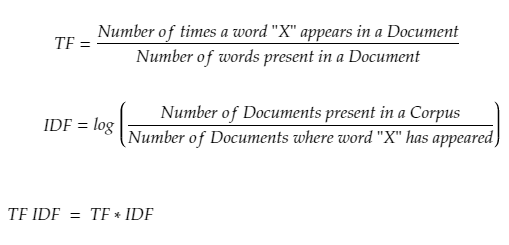

In [8]:
vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(documents)

In [9]:
print(f'Tfidf Representation matrix :\n{vectorizer.idf_}') #IDF for all words in the vocabulary
print(f'\nFeature names :\n{vectorizer.get_feature_names_out()}')

Tfidf Representation matrix :
[1.40546511 2.5040774  2.5040774  2.5040774  2.5040774  1.40546511
 2.5040774  2.5040774  2.5040774  2.5040774  2.5040774  2.5040774
 2.5040774  2.5040774  2.5040774  2.5040774  2.5040774  2.5040774
 2.5040774  2.5040774  2.5040774  1.81093022 2.5040774  2.09861229
 2.5040774  2.5040774 ]

Feature names :
['bank' 'beautiful' 'bought' 'cash' 'grocery' 'he' 'market' 'money' 'need'
 'painted' 'painter' 'people' 'picture' 'protesting' 'river' 'school'
 'she' 'slept' 'slepth' 'studying' 'the' 'today' 'tree' 'wa' 'went'
 'withdrew']


In [10]:
vector.shape

(8, 26)

In [11]:
temp = vectorizer.transform([test_query])
print(f"\nTfidf representation for '{test_query}':\n{temp.toarray()}")


Tfidf representation for 'He was playing by the bank.':
[[0.43961442 0.         0.         0.         0.         0.43961442
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.78324857 0.         0.         0.
  0.         0.        ]]


In [12]:
query = vectorizer.transform(sentences)
similarity = cosine_similarity(vector,query)

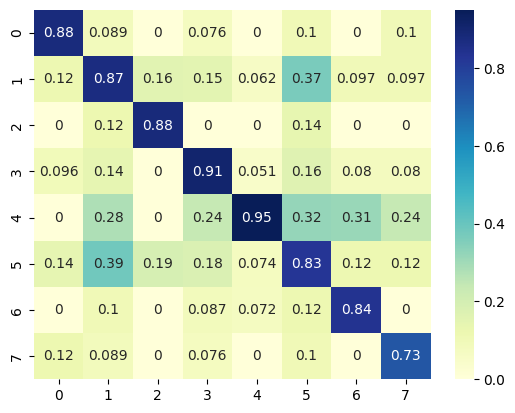

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(similarity, annot=True, cmap="YlGnBu")
plt.show()

In [14]:
def get_similarity(doc1,doc2):
    vectorizer = TfidfVectorizer()
    vector = vectorizer.fit_transform(doc1)
    query = vectorizer.transform([doc2])
    similarity = cosine_similarity(vector,query).tolist()
    temp = []
    for i in similarity:
        for j in i:
            temp.append(j)
    df = pd.DataFrame(data={'sentence1':doc1,'sentence2':doc2,'score':temp})
    return df,temp

In [15]:
df,similarity = get_similarity(sentences,test_query)
df

,sentence1,sentence2,score
0,He was in need of some cash.,He was playing by the bank.,0.281453
1,He withdrew money from the bank today.,He was playing by the bank.,0.287279
2,She bought groceries from market today.,He was playing by the bank.,0.000000
3,He went by the river bank and slept under a tree.,He was playing by the bank.,0.380147
4,The painter painted a beautiful picture of the...,He was playing by the bank.,0.219686
5,He slepth by the bank today.,He was playing by the bank.,0.594027
6,People were protesting at the bank.,He was playing by the bank.,0.180876
7,He was studying at the school.,He was playing by the bank.,0.420776


`Disadvantages:`
- **Tf** increases linearly with term ouccruing in document.For instance in articles about dogs, Article A containing 500 times *'dog'* is not twice as relevant as Article B containing 250 times *'dog'* in it.
- **Idf** becomes zero if all documents are almost similar

#### 1.2 BM25

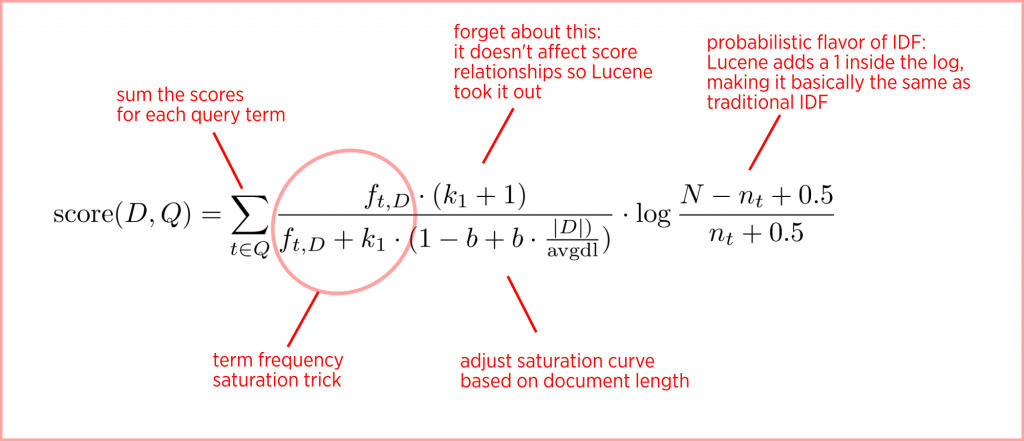

<br><br>
k ~=1.25
b ~= 0.75

In [16]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse

In [17]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse


class BM25(object):
    def __init__(self, b=0.75, k1=1.6):
        self.vectorizer = TfidfVectorizer(norm=None, smooth_idf=False)
        self.b = b
        self.k1 = k1

    def fit(self, X):
        """ Fit IDF to documents X """
        self.vectorizer.fit(X)
        y = super(TfidfVectorizer, self.vectorizer).transform(X)
        self.avdl = y.sum(1).mean()

    def transform(self, q, X):
        """ Calculate BM25 between query q and documents X """
        b, k1, avdl = self.b, self.k1, self.avdl

        # apply CountVectorizer
        X = super(TfidfVectorizer, self.vectorizer).transform(X)
        len_X = X.sum(1).A1
        q, = super(TfidfVectorizer, self.vectorizer).transform([q])
        assert sparse.isspmatrix_csr(q)

        # convert to csc for better column slicing
        X = X.tocsc()[:, q.indices]
        denom = X + (k1 * (1 - b + b * len_X / avdl))[:, None]
        # idf(t) = log [ n / df(t) ] + 1 in sklearn, so it need to be coneverted
        # to idf(t) = log [ n / df(t) ] with minus 1
        idf = self.vectorizer._tfidf.idf_[None, q.indices] - 1.
        numer = X.multiply(np.broadcast_to(idf, X.shape)) * (k1 + 1)                                                          
        return (numer / denom).sum(1).A1
        

In [18]:
bm25 = BM25()
bm25.fit(documents)
scores = bm25.transform(test_query, sentences).tolist()
print(scores)

[0.560972073615878, 2.6551277383590466, 0.0, 2.4409325594662166, 2.9445970817981824, 2.910530807379556, 2.7190313242022164, 2.7190313242022164]


Here I normalised the score.

In [19]:
df = pd.DataFrame(data={'sentence1':sentences,
                        'sentence2':test_query,
                        'tfidf_score':similarity,
                        'bm25_score':(scores/np.linalg.norm(scores))})
df

,sentence1,sentence2,tfidf_score,bm25_score
0,He was in need of some cash.,He was playing by the bank.,0.281453,0.083393
1,He withdrew money from the bank today.,He was playing by the bank.,0.287279,0.394705
2,She bought groceries from market today.,He was playing by the bank.,0.000000,0.000000
3,He went by the river bank and slept under a tree.,He was playing by the bank.,0.380147,0.362864
4,The painter painted a beautiful picture of the...,He was playing by the bank.,0.219686,0.437737
5,He slepth by the bank today.,He was playing by the bank.,0.594027,0.432673
6,People were protesting at the bank.,He was playing by the bank.,0.180876,0.404205
7,He was studying at the school.,He was playing by the bank.,0.420776,0.404205


In [20]:
scores = []
for i in range(0,len(sentences)):
    scores.append(bm25.transform(sentences[i], sentences).tolist())

scores = scores/np.linalg.norm(scores)

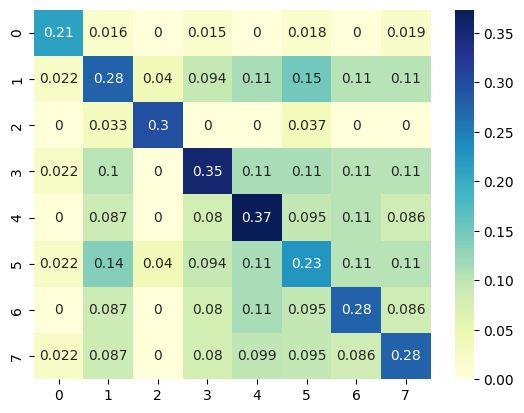

In [21]:
sns.heatmap(scores, annot=True, cmap="YlGnBu")
plt.show()

The above result is probably incorrect, since similarity scores of a sequence with itself should be high , ideally 1. This might be probably due to normalising of score.